In [51]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact, Output, FloatSlider, Checkbox, IntSlider, HBox, VBox
import pandas as pd
from numpy import cos,sin,pi,dot,arccos 
from numpy.linalg import norm # this is the magnitude function
from mpl_toolkits.mplot3d import axes3d
# from itertools import combinations

from ipykernel.pylab.backend_inline import flush_figures
%matplotlib widget

plt.rcParams['figure.figsize'] = [6,6]


# Uncomment the one that corresponds to your Jupyter theme
# plt.style.use('default')
plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
# plt.style.use('Solarize_Light2')

# plt.rcParams.update({
#     "text.usetex": True,
# #     "font.family": "serif",
# })

<style>
td {
  font-size: 20px;
}
</style>

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


## Vector Operations

Let $\vec v, \vec w$ be vectors in $\RR^n$ and $c$ a scalar. 

| Operation | Notation | Formula | Output |
|---|---| --- |---|
| magnitude    | $|\vec v|$ | $$\sqrt{\sum v_i^2}$$ | scalar |
| scalar multiplication | $c \vec v$ | $$\langle c v_1, \ldots ,c v_n \rangle $$| vector |
| vector addition | $\vec v + \vec w$ | $$\langle v_1 + w_1,\ldots, v_n + w_n \rangle $$| vector |
| dot product | $\vec v \cdot \vec w$ | $$v_1 w_1 + \cdots + v_n w_n  $$| scalar |

<p style="padding-bottom:40%;"> </p>

## Projection

Suppose $\vec b \neq \vec 0$.

The **vector projection** of the vector $\vec a$ onto $\vec b$ is 
$$\operatorname{proj}_\vec b \vec a = \frac{\vec a \cdot \vec b}{\vec b \cdot \vec b} \vec b. $$

In [52]:
display(HTML("""
<iframe src="https://pollev-embeds.com/multiple_choice_polls/C1v57TgtTNnkzhvCgHIb7/respond" width="800px" height="600px"></iframe>
"""))

<p style="padding-bottom:40%;"> </p>

# Lecture 03 - Cross Product, Lines, Planes

**Objectives:**

  - Cross Product
    - Formula
    - Properties
    - Application to volume
  - Lines and Planes
    - Parametric v. equation form
    - Find the [line/plane] that...

<p style="padding-bottom:40%;"> </p>

## Cross Product

It turns out $\RR^3$ is special. There happens to be a vector 'multiplication' of two vectors $$\vec v \times \vec w$$ that gives a new vector. This **does not work** in $\RR^2$ (and most other dimensions).

<p style="padding-bottom:40%;"> </p>

The following properties actually define the cross product.

  - $\vec v \times \vec w$ is bilinear. 

  - $\vec v \times \vec w  = - \vec w \times \vec v $ (antisymmetry)

  - $\vec i \times \vec j = \vec k$
  - $\vec j \times \vec k = \vec i$
  - $\vec k \times \vec i = \vec j$
  

<p style="padding-bottom:40%;"> </p>

## Formula

$$ \langle a,b,c \rangle\times \langle d,e,f \rangle = (a\vec i + b\vec j + c \vec k)\times(d\vec i + e\vec j + f \vec k)$$

$$ = \begin{vmatrix} \vec i & \vec j & \vec k \\a &b &c \\ d & e & f \\ \end{vmatrix} $$

$$ = (bf-ce)\,\vec i + (cd-af)\, \vec j + (ae - bd)\, \vec k  $$

In [123]:
u = np.cross((2,2,-4), (3, 1, 10))

In [125]:
np.dot(u, (3, 1, 10))

0

<p style="padding-bottom:40%;"> </p>

## Properties of $\vec v \times \vec w$

  - $\vec v \times \vec w$ is perpendicular to *both* $\vec v $ and $\vec w$.

  - $\vec v \times \vec w$ points in the direction according to the right-hand-rule.

  - $|\vec v \times \vec w| = |\vec v ||\vec w|\sin\theta$ where theta is the (positive) angle between the vectors.

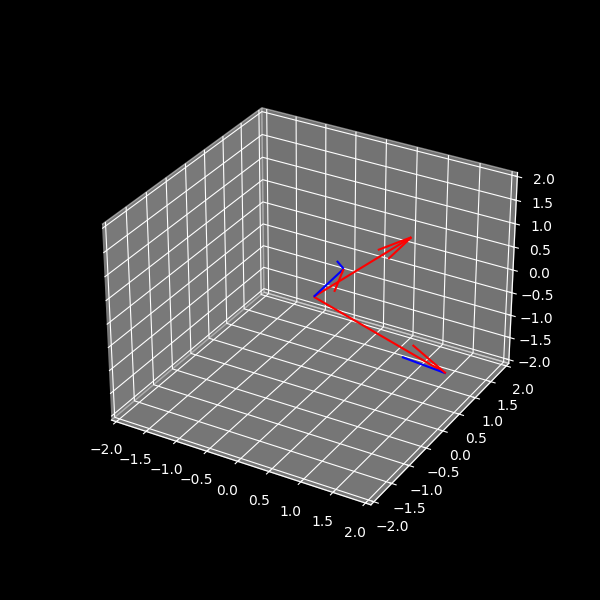

In [118]:
fig = plt.figure()
ax = plt.subplot(projection='3d')
# ax.view_init(30,angle)
ax.set_autoscale_on(True)
ax.quiver([0,0,0],[0,0,0],[0,0,0],[1,2,-1.2],[1,.2,3],[1,-1,-1.8],color=['r','r','b'])
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_zlim([-2,2]);




### Example

  1. Find a unit vector perpendicular to $\langle 1,2,-1\rangle$ and $\langle 3,0,1\rangle$. Is there only one?

<p style="padding-bottom:40%;"> </p>

## Volumes

The volume of a parallelopiped defined by vectors $\vec u$, $\vec v$, and $\vec w$ as 3 sides is given by $$V = |\vec u\cdot(\vec v \times \vec w)|.$$ The inner expression is called the **triple product** of the three vectors.

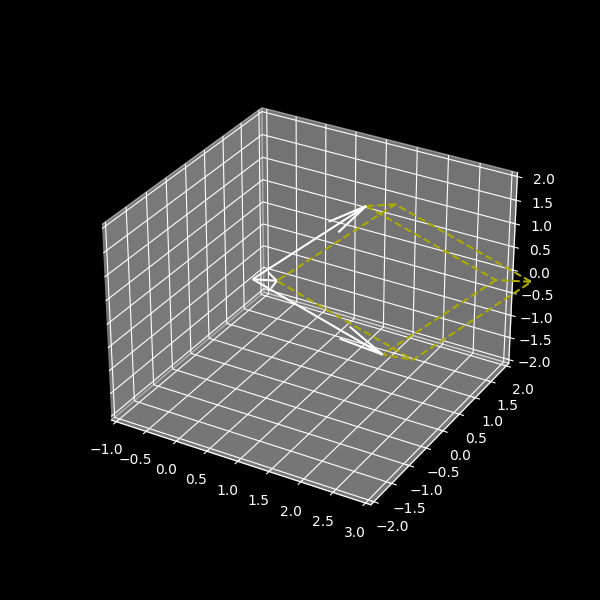

In [119]:

fig = plt.figure()
ax = plt.subplot(projection='3d')

uvw = np.array([[1,1.5,1],[2,.2,-1],[1,-1,1]])
u,v,w = uvw
ax.quiver([0,0,0],[0,0,0],[0,0,0],uvw[:,0],uvw[:,1],uvw[:,2])
ppd = np.column_stack([u,u+v,u+v+w,v+w,w,w+u,u+v+w])
ax.plot(ppd[0],ppd[1],ppd[2],color='#AAAA00',ls='dashed')
ppd = np.column_stack([u+v,v,v+w])
ax.plot(ppd[0],ppd[1],ppd[2],color='#AAAA00',ls='dashed')
ppd = np.column_stack([u,u+w])
ax.plot(ppd[0],ppd[1],ppd[2],color='#AAAA00',ls='dashed')
ax.set_autoscale_on(True)
# ax.view_init(30,angle)
ax.set_xlim([-1,3])
ax.set_ylim([-2,2])
ax.set_zlim([-2,2]);


<p style="padding-bottom:40%;"> </p>

## Lines

In $\RR^2$, two distinct points determine a line. The same is true in higher dimensions. 

Similarly, a slope (a scalar) and a point is sufficient in $\RR^2$, but in higher dimension the "direction" of a line needs more than a scalar to be specified. It can be done with a **direction vector**.

<p style="padding-bottom:40%;"> </p>

### Parametric form

The [parametric form](https://3demos.surge.sh/?currentChapter=Intro&shadeUp=true&flipInfo=true&obj0_kind=vector&obj0_params_a=1&obj0_params_b=1&obj0_params_c=.5&obj0_params_x=0&obj0_params_y=0&obj0_params_z=0&obj0_params_show=true&obj1_kind=vector&obj1_params_a=0.2&obj1_params_b=-0.3&obj1_params_c=0&obj1_params_x=1&obj1_params_y=1&obj1_params_z=.5&obj1_params_show=true&obj2_kind=curve&obj2_params_a=-2&obj2_params_b=5&obj2_params_x=.2+t+%2B+1&obj2_params_y=1+-+.3+t&obj2_params_z=0+%2B+.5&obj2_params_tau=0.5586511428571324) for a line through a position $\vec p$ with direction vector $\vec v$ it geven by $$\vec r(t) = \vec p + t \vec v.$$

In [121]:
out = Output()
TITLE = "Parametric Form"

with out:
    fig = plt.figure(TITLE)
    fig.gca().clear()
    ax = plt.subplot(projection='3d')
    
    def update(change):
        t = change['new']
        while ax.collections:
            ax.collections.pop()
        ax.quiver([0,1],[0,1],[0,1],[1,2*t],[1,0],[1,-t*2])
        # ax.quiver([0,1],[0,1],[0,1],[1,2*t],[1,0],[1,-t*2])

    slider = FloatSlider(value=0, min=-1, max=5, step=.01, orientation='vertical')
    slider.observe(update, names=['value'])
    ax.plot([1+2*(-1),1+2*(5)],[1,1],[1-2*(-1),1-2*5],color='k',ls='dashed')
    ax.plot([-1,5],[0,0],[0,0],color='k',lw=.5)
    ax.plot([0,0],[-2,4],[0,0],color='k',lw=.5)
    ax.plot([0,0],[0,0],[-2,4],color='k',lw=.5)

    ax.set_xlim([-1,5])
    ax.set_ylim([-2,4])
    ax.set_zlim([-2,4]);
    # ax.view_init(30, angle)
    ax.set_autoscale_on(True)
    for c in 'xyz':
    #         getattr(ax,f"set_{c}lim")([-6,6]);
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    display(HBox([slider, fig.canvas]))

display(out)

Output()

### Quick exercise

Write a parametric form for a line through position vectors $\vec p$ and $\vec q$.

<p style="padding-bottom:40%;"> </p>

### Alternate form

Sometimes lines in $\RR^3$ are written as 3 equations:

\begin{align*}
x &= v_1 t + p_1 \\
y &= v_2 t + p_2 \\
z &= v_3 t + p_3
\end{align*}

If we solve for the common parameter $t$, we get the **symmetric equations**:
$$ \frac{x - p_1}{v_1} = \frac{y - p_2}{v_2} = \frac{z - p_3}{v_3}$$

<p style="padding-bottom:40%;"> </p>

## Exercises

  1. Where does the line through $(2,4,-2)$ and $(3,1,-1)$ cross the $xy$-plane?

<p style="padding-bottom:40%;"> </p>

  2. Is the line $(2,4,0)$ and $(1,1,1)$ perpendicular to the line through $(3,3,4)$ and $(3,-1,-8)$?

<p style="padding-bottom:40%;"> </p>

# Planes

By analogy, we could parametrize planes in a similar way, but need 2 parameters.

$$\vec r(s,t) = \vec p + t\vec v + s \vec w$$

Output()

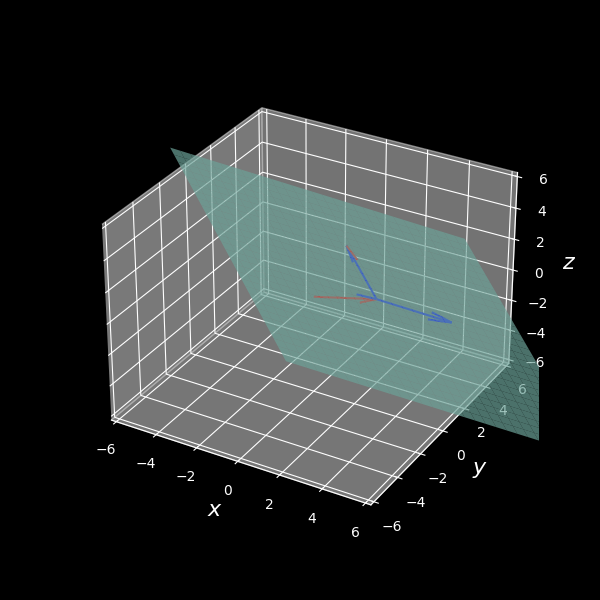

In [94]:
out = Output()

with out:
    fig = plt.figure("Parametric Plane")    
    ax = plt.subplot(projection='3d')

    s = t = np.linspace(-2,2,30)
    s,t = np.meshgrid(s,t)

    x = 3 - 2*t + 3*s
    y = 0 + 1*t + 1*s
    z = 1 + 2*t - 1*s

    ax.plot_surface(x,y,z,alpha=.7)
    r,v,w = np.column_stack([[0,0,0],[3,0,1],[3,0,1],[3,0,1],[-2,1,2],[3,1,-1]])
    ax.quiver(r[:3],v[:3],w[:3],r[3:],v[3:],w[3:],color=['r','b','b']);
    ax.set_autoscale_on(True)
    for c in 'xyz':
        getattr(ax,f"set_{c}lim")([-6,6]);
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
        
display(out)

<p style="padding-bottom:40%;"> </p>

## Equation of a plane

But a more efficient way in $\RR^3$ recognizes that a plane can be define by 
  - a position vector $\vec p = \langle p_1,p_2,p_3 \rangle$, and
  - a **normal** vector $\vec n = \langle a,b,c \rangle$, perpendicular to the plane.
  
So a position vector $\vec x = \langle x,y,z \rangle$ is on the plane if and only if $$\vec n\cdot(\vec x - \vec p) = 0 $$

Output()

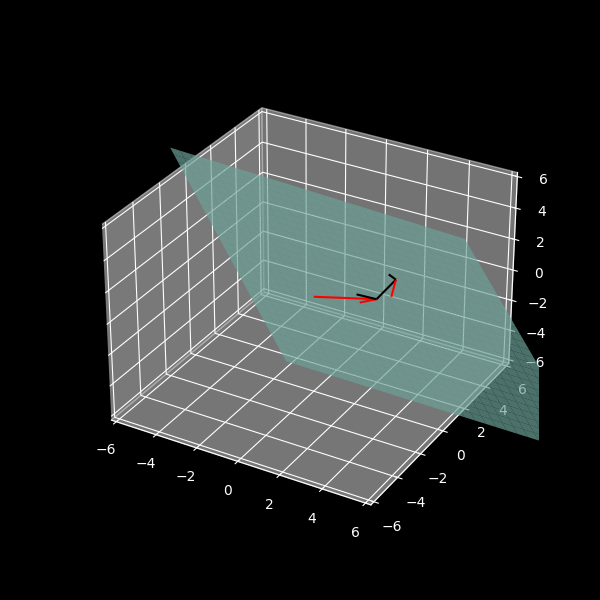

In [93]:
out = Output()

with out:
    fig = plt.figure("Plane Equation")    
    ax = plt.subplot(projection='3d')

    s = t = np.linspace(-2,2,30)
    s,t = np.meshgrid(s,t)

    n = -np.cross([-2,1,2],[3,1,-1])

    x = 3 - 2*t + 3*s
    y = 0 + 1*t + 1*s
    z = 1 + 2*t - 1*s

    ax.plot_surface(x,y,z,alpha=.7)
    r,v,w = np.column_stack([[0,0,0],[3,0,1],[3,0,1],n])
    ax.quiver(r[:2],v[:2],w[:2],r[2:],v[2:],w[2:],color=['r','k']);
    for c in 'xyz':
        getattr(ax,f"set_{c}lim")([-6,6]);    
        
display(out)




## Equation of a plane

In coordinates, this becomes $$a(x-p_1) + b (y-p_2) + c (z-p_3) = 0$$ or, alternatively, $$ax+by+cz = d$$ where $d=\vec n \cdot\vec p$.


<p style="padding-bottom:40%;"> </p>

#### Quick exercise

What is a normal vector to the plane given by $$ x+2y = 16-8z?$$
Find a point on this plane. 

<p style="padding-bottom:40%;"> </p>

### Exercises

  1. Find an equation of the plane through $(1,0,0)$, $(0,1,0)$, and $(0,0,1)$.

  2. Find a parametric form for the line of intersection of the planes given by $x+y-z = 2$ and $2x - y + 3z = 1$.

<p style="padding-bottom:40%;"> </p>

<p style="padding-bottom:40%;"> </p>

# Distance between points, lines, and planes

The distance between points is given easily by the distance formula, but often one wants to know the distance from a position to a given set of points, or between two sets. First, we must specify by "distance to a set" we mean **the minimum of the distances to all points is the set**.

#### Example

Find the distance from the origin to the line given by 
$$\vec r(t) = (3-t)\,\vec i + 2t\,\vec j + (t - 2)\,\vec k.$$

In [116]:
out = Output()
with out:
    p,v = np.array([[3,0,-2],[-1,2,1]])
    pj = np.dot(p,v)/np.dot(v,v)*v
    
    q1, q2 = None, None

    slider = FloatSlider(value=0, min=-1, max=5, step=.01, orientation='horizontal')

    # slider = FloatSlider(value=0, min==2, max=5, step=.1, orientation='vertical')
    sol = Checkbox(value=False, description="solution")
    
    fig = plt.figure("Distance Point to Line")
    ax = fig.add_subplot(projection='3d')
    
    def update_t(change):
        global q1
        t = change.get('new', 0)
        if q1 in ax.collections:
            ax.collections.remove(q1)
        q1 = ax.quiver([0,0],[0,0],[0,0],[3,3-1*t],[0,2*t],[-2,-2+t])
        
    slider.observe(update_t, names=['value'])
        
    ax.plot([5,-2],[-4,10],[-4,3],color='k',ls='dashed')

    ax.set_xlim([-1,5])
    ax.set_ylim([-2,4])
    ax.set_zlim([-2,4]);
    
    vx,vy,vz = np.column_stack([[0,0,0],pj,pj,p-pj])
    def update_sol(change):
        global q2
#         print(change)
        if q2 in ax.collections:
            ax.collections.remove(q2)
        if change['new']:
            q2 = ax.quiver(vx[:2],vy[:2],vz[:2],vx[2:],vy[2:],vz[2:],color='r')
        else:
            fig.canvas.draw_idle()
    sol.observe(update_sol, names=['value'])
            
    display(VBox([HBox([slider, sol]), fig.canvas]))
display(out)

Output()

<p style="padding-bottom:40%;"> </p>

### Distance from a point to a line

We can generalize this:
The distance from a point at position $\vec x$ to a line with parametric form $\vec r (t) = \vec p + t\,\vec v$ is given by $$|\vec x - \vec p - \operatorname{proj}_\vec v (\vec x - \vec p) |.$$